In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import linear_model
from word2number import w2n

%matplotlib inline

In [101]:
# !pip install word2number

In [102]:
df = pd.read_csv('~/py-Jupyter-notebook/DataSets/hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [103]:
# Data Preprocessing

test_mean = math.floor(df['test_score(out of 10)'].mean())
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(test_mean)

In [104]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [105]:
df['experience'] = df['experience'].fillna('zero')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [106]:
# converting words 2 number

df['experience'] =  df['experience'].apply(w2n.word_to_num)

In [107]:
df.head(3)

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000


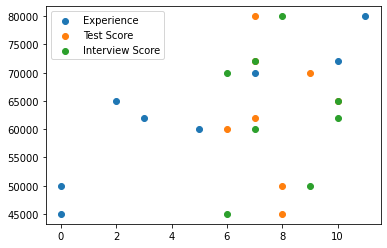

In [108]:
# Identifiying Relationship

plt.scatter(df['experience'],df['salary($)'])
plt.scatter(df['test_score(out of 10)'],df['salary($)'])
plt.scatter(df['interview_score(out of 10)'],df['salary($)'])
plt.legend(['Experience','Test Score','Interview Score'])

In [109]:
#split dataset for X & Y

X_train = df.drop('salary($)', axis='columns')
y_train = df['salary($)']

In [110]:
# creating & training the model

multi_reg = linear_model.LinearRegression()
multi_reg.fit(X_train, y_train)

LinearRegression()

In [111]:
print(multi_reg.coef_)
print(multi_reg.intercept_)

[2922.26901502 2221.30909959 2147.48256637]
14992.65144669314


In [112]:
# prediction
exp = int(input('Enter Experience (NUMBER):'))
test_score = int(input('Enter test score (NUMBER):'))
interview_score = int(input('Enter interview score (NUMBER):'))

y_prediction = multi_reg.predict([[exp, test_score, interview_score]])
print("\nPredicted Salary($):",y_prediction)

# model score 

model_score = multi_reg.score(X_train, y_train)
print("\nThe model accuracy was:",model_score)


Enter Experience (NUMBER):12
Enter test score (NUMBER):10
Enter interview score (NUMBER):10

Predicted Salary($): [93747.79628651]

The model accuracy was: 0.9770139014273139


/home/lazylinuxer/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
